In [1]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('projectDataClean.csv')
df.head()

/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,tp_vxo,tp_stu,year,hour,t_sla,time
0,8.0,8.0,1993,10,13.6,11-Oct-1993 10:00:00
1,9.3,9.7,1993,11,14.5,11-Oct-1993 11:00:00
2,10.7,11.3,1993,12,14.7,11-Oct-1993 12:00:00
3,12.0,13.0,1993,13,13.6,11-Oct-1993 13:00:00
4,12.0,12.7,1993,14,12.6,11-Oct-1993 14:00:00


In [2]:
df_train = pd.read_csv('train.csv')
df_val = pd.read_csv('val.csv')


In [3]:
df_train

,tp_vxo,tp_stu,year,hour,t_sla,time
0,9.7,11.0,1994,0,12.8,01-Oct-1994 00:00:00
1,9.0,11.0,1994,1,12.8,01-Oct-1994 01:00:00
2,8.3,10.7,1994,2,12.5,01-Oct-1994 02:00:00
3,7.7,10.3,1994,3,10.7,01-Oct-1994 03:00:00
4,7.0,10.0,1994,4,8.7,01-Oct-1994 04:00:00
...,...,...,...,...,...,...
1676,1.7,3.0,1994,20,5.9,09-Dec-1994 20:00:00
1677,1.3,3.0,1994,21,5.2,09-Dec-1994 21:00:00
1678,1.0,3.0,1994,22,4.7,09-Dec-1994 22:00:00
1679,1.0,2.7,1994,23,4.3,09-Dec-1994 23:00:00


In [26]:
df_train = df_train.rename(columns = {'time' : 'ds'})
df_train = df_train.rename(columns = {'t_sla': 'y'})
m = Prophet()
m.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.3531
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1899.4   0.000172868        75.687      0.4417      0.4417      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       1899.54   0.000337907        74.108   4.434e-06       0.001      209  LS failed, Hessian reset 
     199       1899.61   5.29711e-06       65.4029      0.3235      0.3235      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       1899.62   5.10473e-08       77.0059      0.2328           1      358   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [5]:
df_val = df_val.rename(columns = {'time' : 'ds'})
df_val = df_val.rename(columns = {'t_sla': 'y'})

In [6]:
forecast = m.predict(df_val)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
332,1994-12-23 20:00:00,2.949085,-0.164918,5.881397
333,1994-12-23 21:00:00,2.783821,-0.669544,5.989722
334,1994-12-23 22:00:00,2.638149,-0.796692,5.847033
335,1994-12-23 23:00:00,2.551555,-0.767806,5.699842
336,1994-12-24 00:00:00,2.523311,-0.788857,5.540630


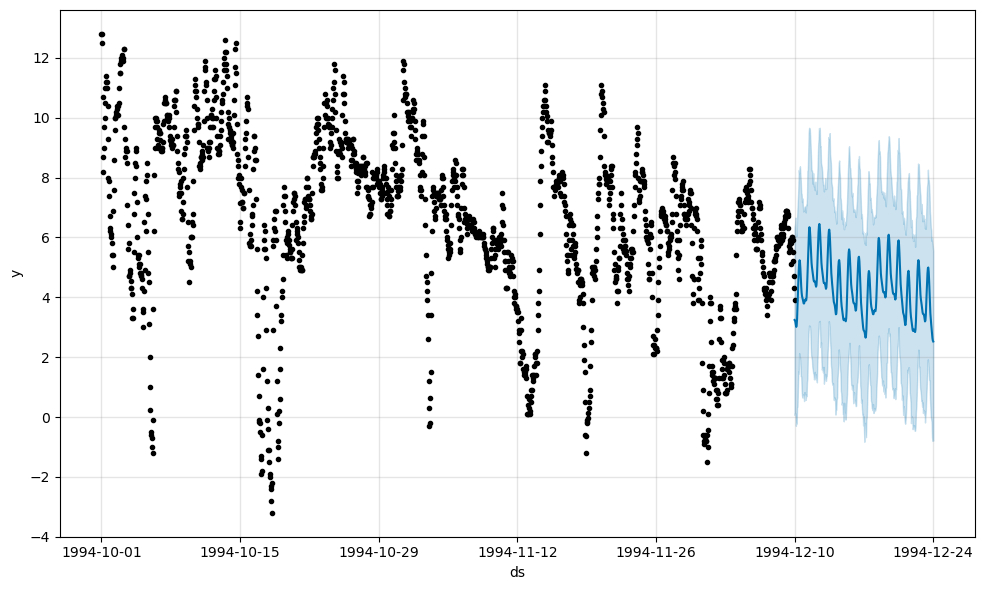

In [7]:
fig1 = m.plot(forecast)

In [16]:
df

,tp_vxo,tp_stu,year,hour,t_sla,time
0,8.0,8.0,1993,10,13.6,11-Oct-1993 10:00:00
1,9.3,9.7,1993,11,14.5,11-Oct-1993 11:00:00
2,10.7,11.3,1993,12,14.7,11-Oct-1993 12:00:00
3,12.0,13.0,1993,13,13.6,11-Oct-1993 13:00:00
4,12.0,12.7,1993,14,12.6,11-Oct-1993 14:00:00
...,...,...,...,...,...,...
14337,0.0,19.7,1995,19,13.9,31-May-1995 19:00:00
14338,0.0,19.0,1995,20,13.0,31-May-1995 20:00:00
14339,0.0,18.0,1995,21,12.6,31-May-1995 21:00:00
14340,0.0,17.0,1995,22,12.4,31-May-1995 22:00:00


In [31]:
df_

,tp_vxo,tp_stu,year,hour,y,ds
0,9.7,11.0,1994,0,12.8,01-Oct-1994 00:00:00
1,9.0,11.0,1994,1,12.8,01-Oct-1994 01:00:00
2,8.3,10.7,1994,2,12.5,01-Oct-1994 02:00:00
3,7.7,10.3,1994,3,10.7,01-Oct-1994 03:00:00
4,7.0,10.0,1994,4,8.7,01-Oct-1994 04:00:00
...,...,...,...,...,...,...
1676,1.7,3.0,1994,20,5.9,09-Dec-1994 20:00:00
1677,1.3,3.0,1994,21,5.2,09-Dec-1994 21:00:00
1678,1.0,3.0,1994,22,4.7,09-Dec-1994 22:00:00
1679,1.0,2.7,1994,23,4.3,09-Dec-1994 23:00:00


In [59]:
df_

,tp_vxo,tp_stu,year,hour,y,ds
0,8.0,8.0,1993,10,13.6,11-Oct-1993 10:00:00
1,9.3,9.7,1993,11,14.5,11-Oct-1993 11:00:00
2,10.7,11.3,1993,12,14.7,11-Oct-1993 12:00:00
3,12.0,13.0,1993,13,13.6,11-Oct-1993 13:00:00
4,12.0,12.7,1993,14,12.6,11-Oct-1993 14:00:00
...,...,...,...,...,...,...
14337,0.0,19.7,1995,19,13.9,31-May-1995 19:00:00
14338,0.0,19.0,1995,20,13.0,31-May-1995 20:00:00
14339,0.0,18.0,1995,21,12.6,31-May-1995 21:00:00
14340,0.0,17.0,1995,22,12.4,31-May-1995 22:00:00


In [ ]:
df_val

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -16.0311


/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       463.723    0.00744938       120.619   0.0001047       0.001      132  LS failed, Hessian reset 
      99       464.174   0.000203559       71.8823      0.9311      0.9311      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       464.371    0.00112151       73.1964   1.253e-05       0.001      261  LS failed, Hessian reset 
     199       464.442   7.00967e-05       66.3219           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        464.48   3.83115e-07       57.5367      0.3424           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334        464.48   1.76246e-07       70.5225      0.3253       0.947      518   
Optimization terminated normally: 
  Convergence detected: rel

In [78]:
len(df_val)

337

In [60]:
%%capture
from prophet.diagnostics import cross_validation
m = Prophet()

#df_ = df_val.rename(columns = {'time' : 'ds'})
#df_ = df_.rename(columns = {'t_sla': 'y'})
m.fit(df_val)
df_cv = cross_validation(m, period = '1 hour', horizon = '1 hour')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -642.477
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       25496.1      0.080851       977.402           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       25855.1     0.0148302       370.799           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       26085.5     0.0140516       1157.41           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         26148     0.0317038       976.057      0.5046      0.5046      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       26227.4      0.122959       826.732           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha  


KeyboardInterrupt



In [61]:
df_cv

In [ ]:
df_cv.index[df_cv.ds == df_val.ds[0]].tolist()

[1511]

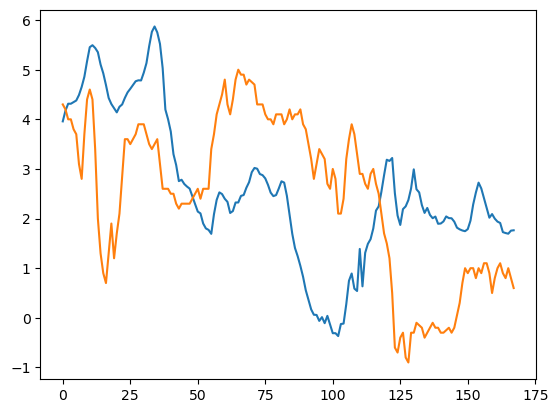

In [53]:
df_cv.iloc[1511:1515]

In [54]:
len(df_cv)


,tp_vxo,tp_stu,year,hour,y,ds
0,1.0,2.3,1994,0,3.9,10-Dec-1994 00:00:00
1,1.0,2.0,1994,1,4.2,10-Dec-1994 01:00:00
2,1.0,2.0,1994,2,4.0,10-Dec-1994 02:00:00
3,1.0,2.0,1994,3,3.9,10-Dec-1994 03:00:00
4,1.0,2.0,1994,4,4.2,10-Dec-1994 04:00:00
...,...,...,...,...,...,...
332,-2.0,0.0,1994,20,0.9,23-Dec-1994 20:00:00
333,-2.0,0.0,1994,21,0.8,23-Dec-1994 21:00:00
334,-2.0,0.0,1994,22,1.0,23-Dec-1994 22:00:00
335,-2.0,-0.3,1994,23,0.8,23-Dec-1994 23:00:00


[1511]

In [8]:
error = df_val['y'] - forecast['yhat']

In [10]:
import numpy as np
np.var(error)

7.469204345040821

In [11]:
df_test = pd.read_csv('test.csv')
df_test = df_test.rename(columns = {'time' : 'ds'})
df_test = df_test.rename(columns = {'t_sla': 'y'})

In [12]:
forecast = m.predict(df_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
332,1995-05-12 20:00:00,-4.240061,-10.206478,1.645878
333,1995-05-12 21:00:00,-4.405326,-10.358961,1.450424
334,1995-05-12 22:00:00,-4.550997,-10.187569,1.358423
335,1995-05-12 23:00:00,-4.637591,-10.182366,1.288486
336,1995-05-13 00:00:00,-4.665836,-10.424214,1.527962


In [13]:
error = df_test['y'] - forecast['yhat']
np.var(error)

14.2825045505153

/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/nils/opt/anaconda3/envs/dl/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


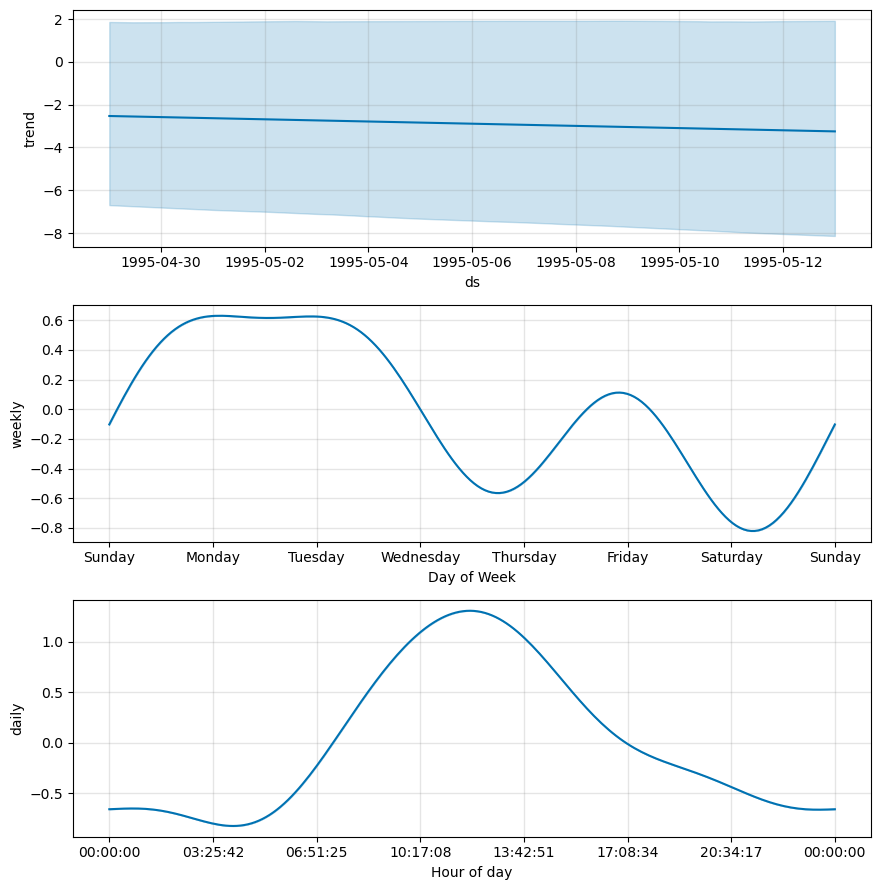

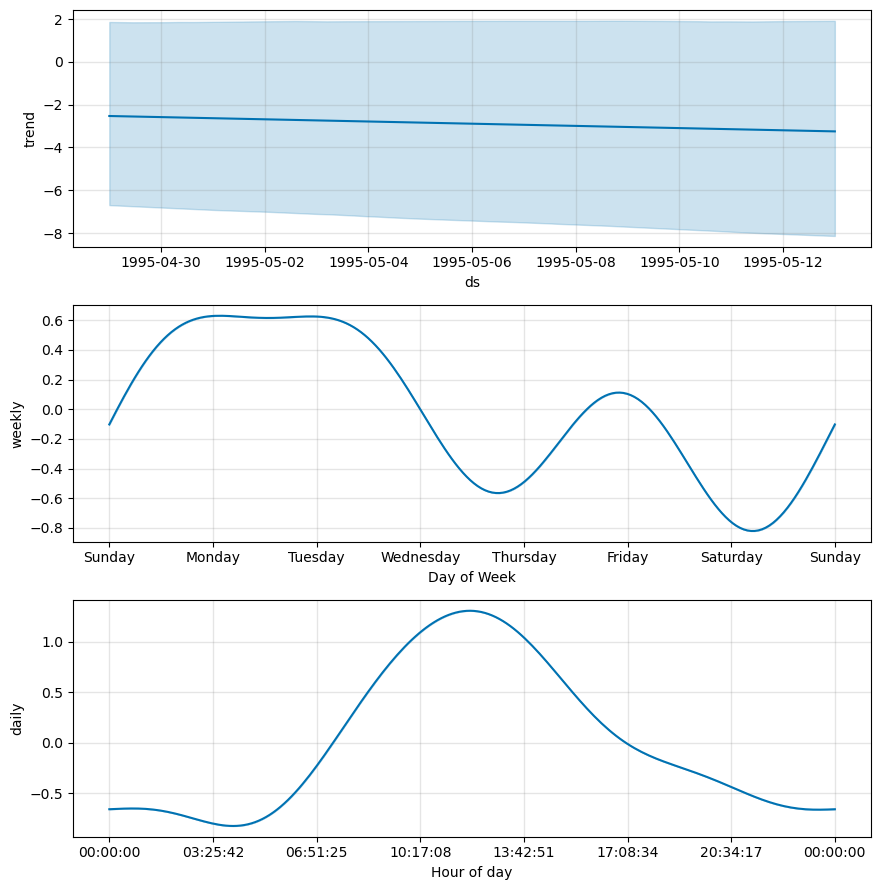

In [14]:
m.plot_components(forecast)


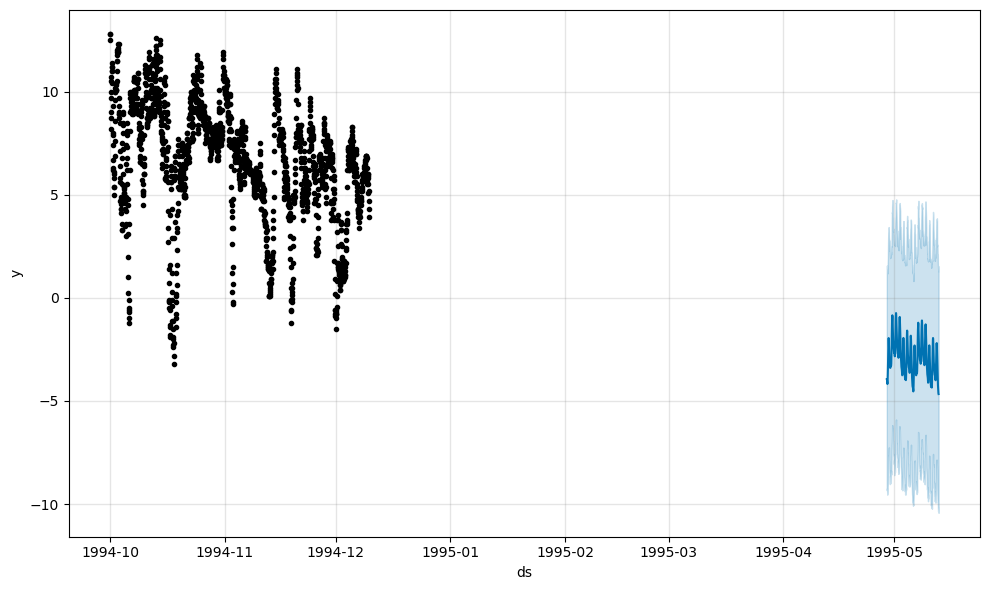

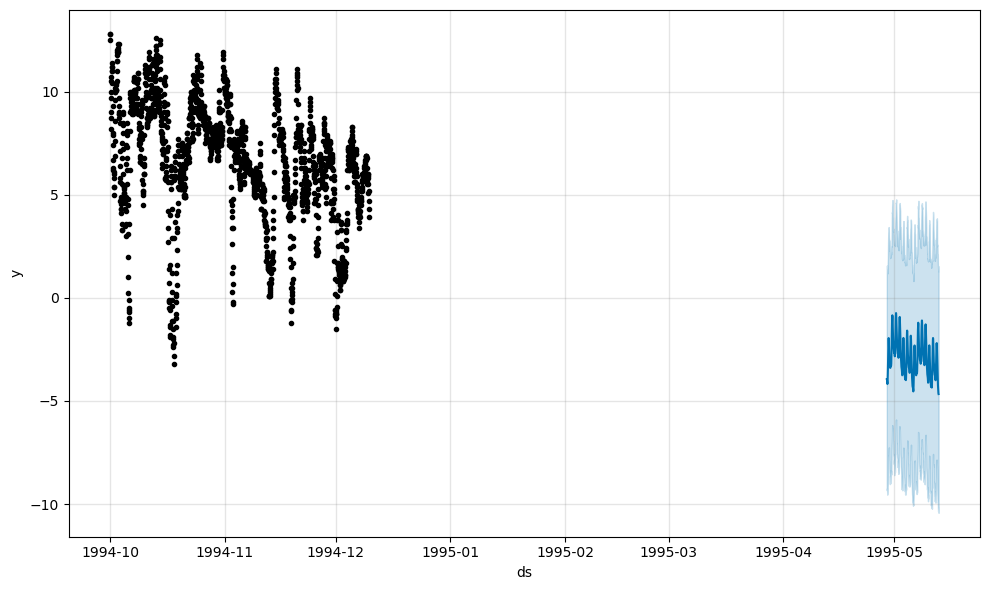

In [15]:
m.plot(forecast)


In [18]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)